Animasi disimpan di: D:\\AFRAH\\KULIAH\\AAAAA\\SEM 05\\2. Metode Komputasi\bandul_chaos.gif


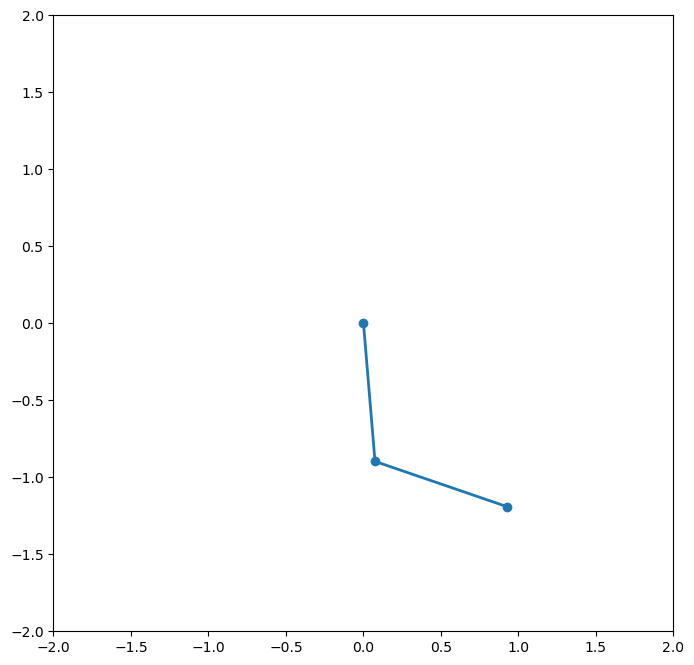

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Parameter bandul
g = 9.81  # Percepatan gravitasi (m/s^2)
l1 = 1.0  # Panjang tali bandul pertama (m)
l2 = 1.0  # Panjang tali bandul kedua (m)
m1 = 1.0  # Massa bandul pertama (kg)
m2 = 1.0  # Massa bandul kedua (kg)

# Kondisi awal
theta1 = np.pi / 4  # Sudut awal bandul pertama (rad)
theta2 = np.pi / 2  # Sudut awal bandul kedua (rad)
omega1 = 0.0  # Kecepatan sudut awal bandul pertama (rad/s)
omega2 = 0.0  # Kecepatan sudut awal bandul kedua (rad/s)

# Waktu simulasi
t_max = 8 # Waktu simulasi (s)
dt = 0.005  # Langkah waktu lebih kecil untuk pergerakan lebih smooth (s)
t = np.arange(0, t_max, dt)

# Fungsi untuk menghitung turunan sudut dan kecepatan sudut
def deriv(theta1, theta2, omega1, omega2, l1_effective, l2_effective):
    delta = theta2 - theta1
    denom1 = (m1 + m2) * l1_effective - m2 * l1_effective * np.cos(delta) ** 2
    denom2 = (l2_effective / l1_effective) * denom1

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = ((m2 * l1_effective * omega1 ** 2 * np.sin(delta) * np.cos(delta) +
                   m2 * g * np.sin(theta2) * np.cos(delta) +
                   m2 * l2_effective * omega2 ** 2 * np.sin(delta) -
                   (m1 + m2) * g * np.sin(theta1)) / denom1)

    domega2_dt = ((-m2 * l2_effective * omega2 ** 2 * np.sin(delta) * np.cos(delta) +
                   (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
                   (m1 + m2) * l1_effective * omega1 ** 2 * np.sin(delta) -
                   (m1 + m2) * g * np.sin(theta2)) / denom2)

    return dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt

# Inisialisasi array untuk menyimpan hasil
theta1_vals, theta2_vals = [], []
x1_vals, y1_vals = [], []
x2_vals, y2_vals = [], []

# Simulasi
for _ in t:
    # Implementasi pengaruh lingkungan
    air_resistance = 0  # Resistensi udara konstan
    temp_fluctuation = np.clip(0.1 * np.random.randn(), -0.1, 0.1)  # Fluktuasi suhu acak

    # Perubahan panjang tali akibat suhu
    l1_effective = l1 * (1 + temp_fluctuation)
    l2_effective = l2 * (1 + temp_fluctuation)

    # Hitung turunan
    dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt = deriv(theta1, theta2, omega1, omega2, l1_effective, l2_effective)

    # Integrasi Euler
    theta1 += dtheta1_dt * dt
    theta2 += dtheta2_dt * dt
    omega1 += (domega1_dt - air_resistance * omega1) * dt
    omega2 += (domega2_dt - air_resistance * omega2) * dt

    # Simpan hasil untuk animasi
    theta1_vals.append(theta1)
    theta2_vals.append(theta2)
    x1 = l1_effective * np.sin(theta1)
    y1 = -l1_effective * np.cos(theta1)
    x2 = x1 + l2_effective * np.sin(theta2)
    y2 = y1 - l2_effective * np.cos(theta2)
    x1_vals.append(x1)
    y1_vals.append(y1)
    x2_vals.append(x2)
    y2_vals.append(y2)

# Buat folder untuk menyimpan hasil
output_folder = r"D:\\AFRAH\\KULIAH\\AAAAA\\SEM 05\\2. Metode Komputasi"
os.makedirs(output_folder, exist_ok=True)

# Animasi
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
line, = ax.plot([], [], 'o-', lw=2)

# Fungsi init harus mengembalikan iterable
def init():
    line.set_data([], [])
    return [line]

# Fungsi update juga harus mengembalikan iterable
def update(frame):
    line.set_data([0, x1_vals[frame], x2_vals[frame]], [0, y1_vals[frame], y2_vals[frame]])
    return [line]

ani = animation.FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True)

# Simpan animasi sebagai file GIF
output_path = os.path.join(output_folder, "bandul_chaos.gif")
ani.save(output_path, writer="pillow", fps=24)  # FPS disesuaikan ke 30 untuk mengurangi beban

print(f"Animasi disimpan di: {output_path}")
plt.show()


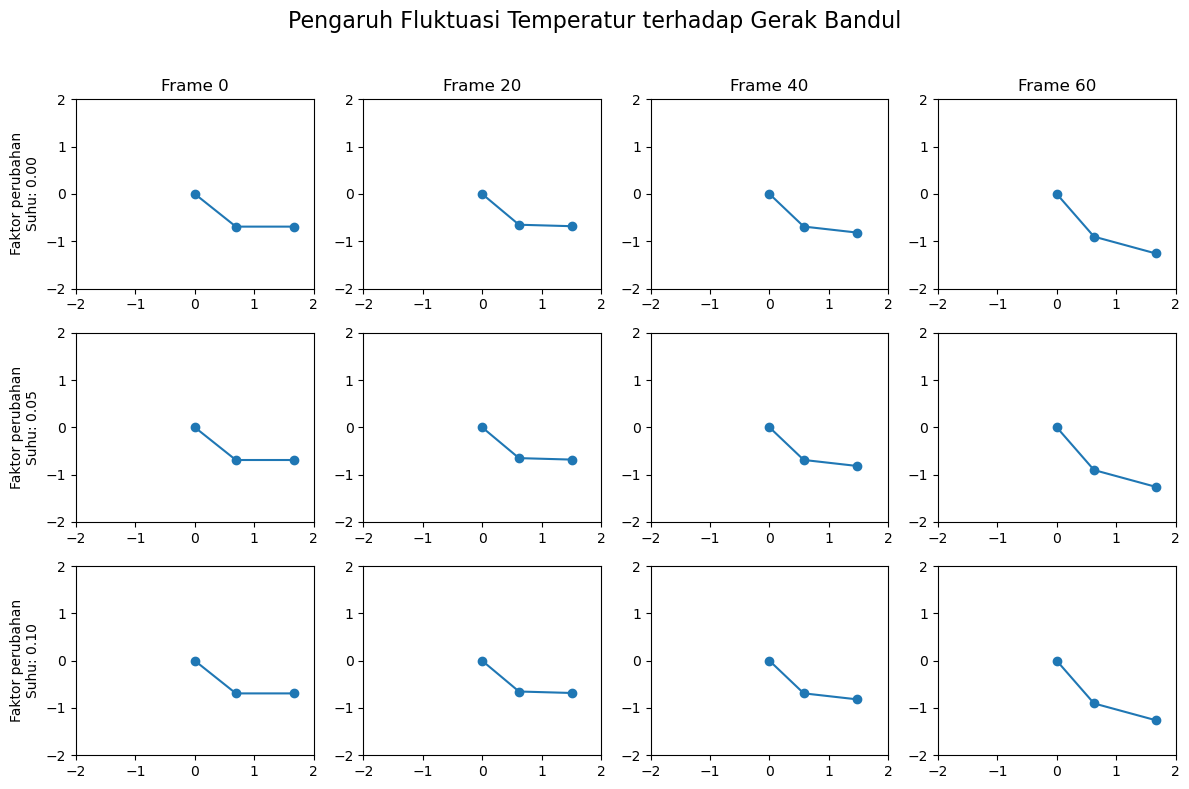

In [3]:
import matplotlib.pyplot as plt

# Faktor fluktuasi suhu yang diuji
temp_factors = [0.0, 0.05, 0.1]  # Sebagai contoh, tiga variasi fluktuasi suhu

# Frame yang akan divisualisasikan
frames_to_plot = [0, 20, 40, 60]

# Membuat grid plot
fig, axes = plt.subplots(len(temp_factors), len(frames_to_plot), figsize=(12, 8))
fig.suptitle("Pengaruh Fluktuasi Temperatur terhadap Gerak Bandul", fontsize=16)

# Loop untuk mengisi setiap subplot
for i, temp_factor in enumerate(temp_factors):
    for j, frame in enumerate(frames_to_plot):
        ax = axes[i, j]
        
        # Ambil data posisi bandul untuk frame tertentu
        x_vals = [0, x1_vals[frame], x2_vals[frame]]
        y_vals = [0, y1_vals[frame], y2_vals[frame]]

        # Plot garis gerak bandul
        ax.plot(x_vals, y_vals, marker="o")
        
        # Menambahkan judul dan label axis
        if i == 0:
            ax.set_title(f"Frame {frame}")
        if j == 0:
            ax.set_ylabel(f"Faktor perubahan\nSuhu: {temp_factor:.2f}")

        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)

# Atur tata letak agar lebih rapi
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

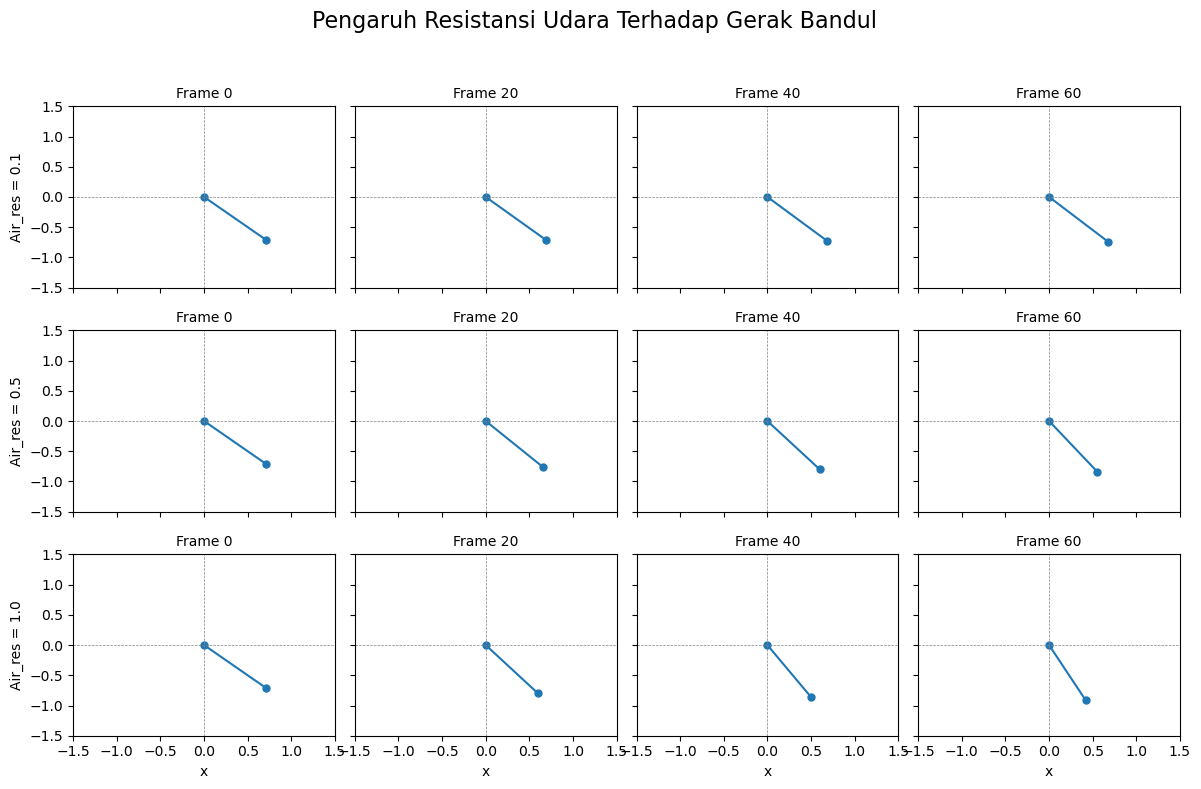

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter simulasi
air_resistance_values = [0.1, 0.5, 1.0]  # Variasi resistansi udara
time_frames = [0, 20, 40, 60]  # Frame yang ingin ditampilkan
theta_initial = [np.pi / 4, np.pi / 2]  # Sudut awal bandul (rad)
t = np.linspace(0, 10, 1000)  # Waktu simulasi

# Fungsi untuk menghitung posisi bandul
def simulate_pendulum(air_resistance, t, theta_initial):
    theta = theta_initial[0] * np.exp(-air_resistance * t)  # Peluruhan eksponensial sederhana
    omega = theta_initial[1] * np.exp(-air_resistance * t)
    x = np.sin(theta)
    y = -np.cos(theta)
    return x, y

# Membuat grid plot
fig, axes = plt.subplots(len(air_resistance_values), len(time_frames), figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("Pengaruh Resistansi Udara Terhadap Gerak Bandul", fontsize=16)

for i, air_resistance in enumerate(air_resistance_values):
    x_vals, y_vals = simulate_pendulum(air_resistance, t, theta_initial)
    for j, frame in enumerate(time_frames):
        ax = axes[i, j]
        ax.plot([0, x_vals[frame]], [0, y_vals[frame]], marker='o', markersize=5)
        ax.set_title(f"Frame {frame}", fontsize=10)
        if j == 0:
            ax.set_ylabel(f"Air_res = {air_resistance}", fontsize=10)
        if i == len(air_resistance_values) - 1:
            ax.set_xlabel("x", fontsize=10)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.axhline(0, color='gray', linewidth=0.5, linestyle='--')
        ax.axvline(0, color='gray', linewidth=0.5, linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("pengaruh_resistansi_gerak_bandul.png")  # Simpan plot sebagai file gambar
plt.show()
